In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_final = pd.DataFrame()
for df in range(1,5):
    df = pd.read_csv(f'assng2_dataset - Sheet{df}.csv')
    df_final = pd.concat([df_final,df],ignore_index= True)
df = pd.read_csv('US_Accidents_Dec20_Updated_sheet1.csv')
df_final = pd.concat([df_final,df])
df_final.head()                                         # Mergin of all the dataframes

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,21-06-18 7:50,21-06-18 13:50,32.92393,-96.77563,32.92379,-96.76877,0.398,Ramp to US-75 - Accident. Two lanes blocked. H...,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
1,2,22-12-17 17:23,22-12-17 17:53,33.236919,-87.560966,33.236919,-87.560966,0,Accident on US-82 McFarland Blvd Westbound at ...,3200,...,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,Night,Night,Day,Day
2,2,11-12-19 15:27,11-12-19 16:38,33.02304,-117.07853,33.02304,-117.07853,0,At Rancho Bernardo Rd - Accident. Obstruction ...,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
3,2,09-10-19 15:06,09-10-19 15:39,38.366671,-122.712364,38.366671,-122.712364,0,At Commerce Blvd/Wilfred Ave - Accident.,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Day,Day,Day,Day
4,2,03-12-19 23:44,04-12-19 1:56,38.597976,-121.383093,38.597976,-121.383093,0,At Arden Way - Accident.,NaN,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,Night,Night,Night,Night


In [3]:
dff= df_final[['Severity','Description','City','County','State','Country','Visibility(mi)','Start_Time', 'End_Time']]   # These are the selected few with necessary information 
dff.dropna(inplace = True)
dff.head()

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Severity,Description,City,County,State,Country,Visibility(mi),Start_Time,End_Time
0,3,Ramp to US-75 - Accident. Two lanes blocked. H...,Dallas,Dallas,TX,US,10,21-06-18 7:50,21-06-18 13:50
1,2,Accident on US-82 McFarland Blvd Westbound at ...,Northport,Tuscaloosa,AL,US,4,22-12-17 17:23,22-12-17 17:53
2,2,At Rancho Bernardo Rd - Accident. Obstruction ...,San Diego,San Diego,CA,US,10,11-12-19 15:27,11-12-19 16:38
3,2,At Commerce Blvd/Wilfred Ave - Accident.,Santa Rosa,Sonoma,CA,US,10,09-10-19 15:06,09-10-19 15:39
4,2,At Arden Way - Accident.,Sacramento,Sacramento,CA,US,0.25,03-12-19 23:44,04-12-19 1:56


# I have taken visiblity as the factor  because it is a very key thing .
# while you drive to be able to see while driving is the most important thing

In [4]:
dff.isnull().sum()

Severity          0
Description       0
City              0
County            0
State             0
Country           0
Visibility(mi)    0
Start_Time        0
End_Time          0
dtype: int64

In [5]:
dff['Visibility(mi)'].unique()              # Checking for any dummy data in visibility

array(['10', '4', '0.25', '6', '5', '8', '3', '7', '2', '9', '80', '1',
       '0.75', '0.5', '30', '0.8', '0.2', '2.5', '1.5', '1.2', '15',
       '1.8', '0', '75', '45', '0.38', 'Visibility(mi)', '20', '0.1',
       '13', '1.6', '70', '40', '1.1', '60', '0.12', '50', '0.06', 9.0,
       10.0, 4.0, 7.0, 1.2, 3.0, 5.0, 6.0, 8.0, 0.0, 0.5, 60.0, 25.0,
       15.0, 2.0, 1.0, 12.0, 2.5, 20.0, 0.2, 1.5, 50.0, 30.0, 0.8, 0.75,
       0.1, 1.8, 0.25, 13.0, 11.0, 45.0, 35.0, 40.0, '25', '0.19', '10.5',
       2.8, 0.12], dtype=object)

In [6]:
def Visiblity(df):
    if df != 'Visibility(mi)':
        return float(df)                                            #Remoing the dummy data
dff['Visibility(mi)'] = dff['Visibility(mi)'].apply(Visiblity )
dff.dropna(inplace = True)

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
dff['Visibility(mi)'].unique()                      #Again Check to make sure of everything

array([1.00e+01, 4.00e+00, 2.50e-01, 6.00e+00, 5.00e+00, 8.00e+00,
       3.00e+00, 7.00e+00, 2.00e+00, 9.00e+00, 8.00e+01, 1.00e+00,
       7.50e-01, 5.00e-01, 3.00e+01, 8.00e-01, 2.00e-01, 2.50e+00,
       1.50e+00, 1.20e+00, 1.50e+01, 1.80e+00, 0.00e+00, 7.50e+01,
       4.50e+01, 3.80e-01, 2.00e+01, 1.00e-01, 1.30e+01, 1.60e+00,
       7.00e+01, 4.00e+01, 1.10e+00, 6.00e+01, 1.20e-01, 5.00e+01,
       6.00e-02, 2.50e+01, 1.20e+01, 1.10e+01, 3.50e+01, 1.90e-01,
       1.05e+01, 2.80e+00])

In [8]:
dct = {}                                    # grouped the dataframe with respect to the years 
                                            # to remove the max,min and all other values of the accidents which occured in the following years
                                            # And took row row as the number of accidents occured in that year.
for keys,dataf in dff.groupby('Visibility(mi)'):     
    dct[keys] = dataf.shape[0]


In [9]:
df6 = pd.DataFrame(dct.values(),dct.keys())
df6['Visibility'] = df6.index     # Converting the dct to a DataFrame for better visualisatin
df6 = df6.rename(columns={0:'Accidents'})
df6.head()      # Number of Accident occured in the following years

,Accidents,Visibility
0.00,16,0.00
0.06,1,0.06
0.10,7,0.10
0.12,3,0.12
0.19,1,0.19


In [10]:
df6[df6.Accidents == max(df6.Accidents)]        # Max of Accident occurence 

,Accidents,Visibility
10.0,18388,10.0


In [11]:

df6  = df6.sort_values(by = 'Visibility')           #Sorting the dataframe with respect to the Visibility


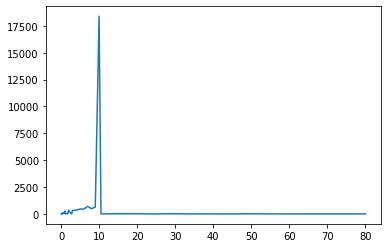

In [12]:
plt.plot(df6['Visibility'],df6.Accidents)
plt.show()                                          #PLot of visibility against accidents

I think my Studies are right it seems like when visibility is too low like below 2 people seem to stay home or drive very carefully 
but when some visibility is increased people seem to gain confidence and drive a bit fast but its still not clear so they may fall into an accident like near 10 the accidents takes its peak.After that as the visibility is high enough after 10 its quite easy to drive .
This is my thinking the reason may or may not be different 